# K-Means from scratch

Le but de ce notebook est de recoder successivement un algorithme K-Means à partir d'un nombre de clusters $k$ et une matrice de données $X$.

On ouvre pour tester le fichier `dataset_1.csv` qui contient deux variables.

On importe les bibliothèques nécessaires.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

On ouvre le fichier et on illustre ses données sur un scatter plot

In [36]:
df = pd.read_csv("dataset_1.csv", index_col="Unnamed: 0")
df.head()

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561


Text(0, 0.5, 'Salaire')

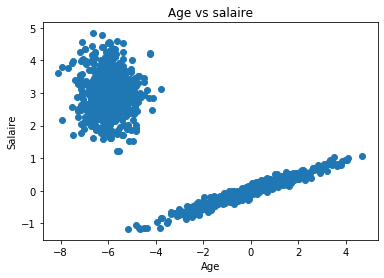

In [37]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title("Age vs salaire")
plt.xlabel("Age")
plt.ylabel("Salaire")

On remarque qu'on peut placer au moins 2 clusters. Pour palcer un cluster, on a plusieurs méthodes à notre disposition.

On peut commencer par une **méthode aléatoire** qui consiste à placer des points dans les limites des données. On peut convertir cette dataframe en une matrice Numpy et voir où se situent les extremum pour chaque variable.

In [38]:
X =np.array(df)

X_max= np.max(X, axis=0)
X_min = np.min(X, axis=0)

print("Maxima de X :")
print(X_max)
print("Minima de X :")
print(X_min)

Maxima de X :
[4.69090369 4.850055  ]
Minima de X :
[-8.096229   -1.19017548]


On peut donc garder un nombre initial $k$ et lancer les centroïdes initiaux

[[ 0.95038797  2.88582274]
 [-0.76521907  3.16448729]
 [-3.61644139 -0.76275243]]


Text(0, 0.5, 'Salaire')

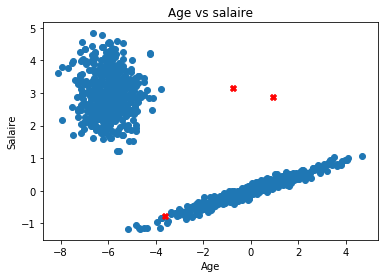

In [39]:
k = 3
centroids  = np.random.random((k,X_min.shape[0])) * (np.tile(X_max,(k,1)) - np.tile(X_min,(k,1))) + np.tile(X_min,(k,1))
print(centroids)

plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker="X", color="red")
plt.title("Age vs salaire")
plt.xlabel("Age")
plt.ylabel("Salaire")

A partir de ces premiers clusters, on peut calculer la distance pour chaque point et assigner un label au point le plus proche. Pour calculer la distance, on peut utiliser la distance **euclidienne** ou la distance de **Manhattan**.

Partons sur la distance euclidienne.

In [40]:
#Initialisation de la matrice
labels = np.zeros((X.shape[0], k))
for cluster in range(k):
    labels[:,cluster] = np.sqrt(np.sum((X - centroids[cluster,:])**2,axis=1))
labels=np.argmin(labels, axis=1)

for i in range(k):
    print(f"Nombre de points dans le cluster {i} :")
    print(labels[labels==i].size)

Nombre de points dans le cluster 0 :
294
Nombre de points dans le cluster 1 :
64
Nombre de points dans le cluster 2 :
642


Text(0, 0.5, 'Salaire')

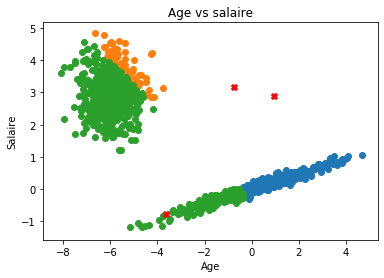

In [41]:
for i in range(k):
    plt.scatter(X[labels==i][:,0], X[labels==i][:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker="X", color="red")
plt.title("Age vs salaire")
plt.xlabel("Age")
plt.ylabel("Salaire")

Le hasard peut être très ou pas convaincant du tout. La prochaine étape est donc de recentrer les centroïdes en fédinissant la moyenne des points.

Les centroïdes ne sont pas alignés


Text(0, 0.5, 'Salaire')

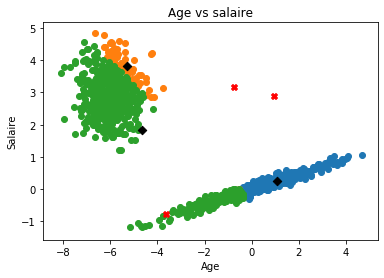

In [42]:
new_centroids = np.zeros(centroids.shape)
for cluster in range(k):
    new_centroids[cluster,:] = np.mean(X[labels==cluster],axis=0)

if (new_centroids!=centroids).all():
    print("Les centroïdes ne sont pas alignés")
else:
    print("Les centroïdes sont alignés")
    
for i in range(k):
    plt.scatter(X[labels==i][:,0], X[labels==i][:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker="X", color="red")
plt.scatter(new_centroids[:,0], new_centroids[:,1], marker="D", color="black")
plt.title("Age vs salaire")
plt.xlabel("Age")
plt.ylabel("Salaire")

On va donc réassigner les nouveaux centroïdes aux vieux centroïdes jusqu'à ce qu'ils ne bougent plus.

In [46]:
nbr_of_iterations = 0
threshold = 1000

while (new_centroids!=centroids).all() or nbr_of_iterations <= threshold:
    centroids = new_centroids
    nbr_of_iterations += 1
    labels = np.zeros((X.shape[0], k))
    for cluster in range(k):
        labels[:,cluster] = np.sqrt(np.sum((X - centroids[cluster,:])**2,axis=1))
    labels=np.argmin(labels, axis=1)
    new_centroids = np.zeros(centroids.shape)
    for cluster in range(k):
        new_centroids[cluster,:] = np.mean(X[labels==cluster],axis=0)

if nbr_of_iterations<=threshold:
    print(f"On a déterminé les centroïdes au bout de {nbr_of_iterations} itérations.")
else:
    print("Limite maximale d'itérations atteinte")

Limite maximale d'itérations atteinte


Text(0, 0.5, 'Salaire')

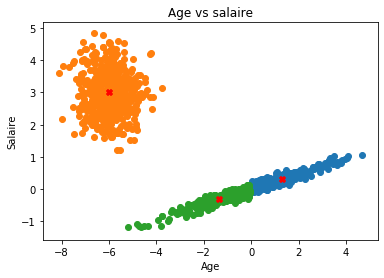

In [45]:
for i in range(k):
    plt.scatter(X[labels==i][:,0], X[labels==i][:,1])
plt.scatter(new_centroids[:,0], new_centroids[:,1], marker="X", color="red")
plt.title("Age vs salaire")
plt.xlabel("Age")
plt.ylabel("Salaire")